<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Алексей! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

# Определение возраста покупателей

## Исследовательский анализ данных

In [4]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [5]:
labels = pd.read_csv('/datasets/faces/labels.csv')
image_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = image_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

print(train_gen_flow)

Found 7591 validated image filenames.


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Ты узнал количество фотографий в датасете. Учитывая эту информацию, а также то, что ты знаешь что мы решаем задачу регрессии, попробуй порассуждать, достаточно ли имеющихся данных? Какие шаги мы можем предпринять в связи с этим?   

</div>

<div class="alert alert-info">
<b> Комментарий студента</b>
Могу предположить что вопрос задан потому, что данных может быть недостаточно.
    
Как варианты можно предложить метод перекрестной вариации, бутстрепп попробовать, сделать балансировку классов, откалибровать данные.
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера v2</b>

Вопрос задан для того, чтобы дать понять, что при проведении EDA уместно задаться вопросом "достаточно ли у нас данных". Мы можем находиться в ситуации, когда нам уже дали датасет, и мы хотим оценить, достаточно ли данных (есть ли смысл продолжать работу). Или мы только начинаем новый проект компьтерного зрения и хотим понять, сколько данных нам нужно собрать для  обучения прототипа и получения первой точности.

К сожалению, однозначных эвристик (правил) помогающих оценить необходимый и достаточный размер датасета нет, слишком всё индивидуально и зависит от специфики самой задачи и изображений, шумности разметки (наличии ошибок и неоднозачностей), требуемой точности.  Но попытки ответа на вопрос "хватил ли данных" с последующей оценкой этого решения после экспериментов помогает быстрее сформировать интуицию.
    

Из своего опыта могу сказать, что для  большинство задач классификации нам требуется около 1К изображений на класс для стабильной работы.  Можем попробовать оценить "близкую задачу" - классификацию возраста на 15 классов (исходя из требуемой точности 6-7 лет). Тогда среднее количество изображений будет около 500 на класс. Что не так много, но уже можно попробовать.
    
Стандартной техникой для борьбы с переобучением в задачах компьютерного зрения является аугментация (кроме архитектурных, использования слоев батчнормализации и прореживания).

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Верно использован ImageDataGenerator как инструмент для доступа к потоку фотографий. Но обрати внимание на название переменной train_datagen. На мой взгляд оно не соответствует тому, что в этой переменной, ведь ты еще не произвел разделение потоков фотографий на обучающий и валидационный наборы.   
</div>

<div class="alert alert-info">
<b> Комментарий студента</b>
Сделал корректировку.
</div>

In [3]:
display(labels.head())
display(labels.info())

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


None

In [4]:
features, target = next(train_gen_flow)
features.shape

(32, 224, 224, 3)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Очень полезно познакомиться с утройством батча. </div>

<AxesSubplot:>

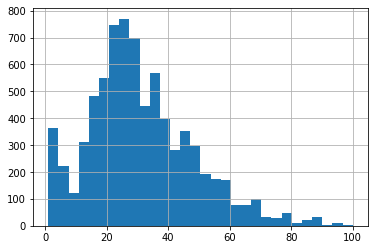

In [5]:
display(labels.real_age.hist(bins=30))

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Получена гистограмма, демонстрирующая распределение целевого признака в наборе данных. Я бы посоветовал увеличить количество корзин (ближе к 100), это позволит увидеть некоторые особенности нашего датасета.</div>

<AxesSubplot:>

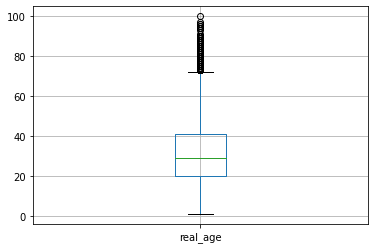

In [6]:
display(labels.boxplot(column=['real_age']))

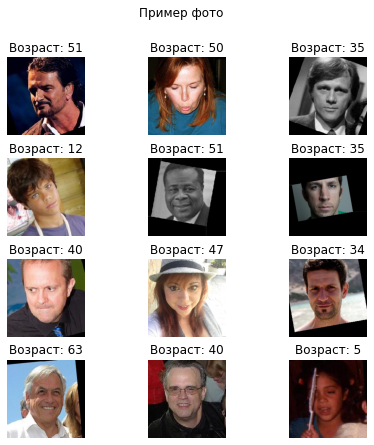

In [7]:
col = 3
row = 4
features, target = next(train_gen_flow)
fig, axs = plt.subplots(row, col, gridspec_kw = dict(wspace = 0.3, hspace = 0.3), figsize = (7,7))
fig.suptitle('Пример фото')
counter = 0
for c in range(col):
    for r in range(row):
        axs[r, c].imshow(features[counter])
        axs[r, c].set_title('Возраст: '+ str(target[counter]))
        axs[r, c].axis('off')
        counter += 1

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Очень хорошо, что выведены фотографии. Это хорошая практика, помогает оценить наши фотографии, улучшить понимание задачи и получить определенную интуицию. А таке заранее оценить подходящие для наших данных методы аугментации. </div>

- Выборка состоит из 7591 фотографий.
- График распределения возраста в выборке представляет нормальное распределение смещенное слево. Преобладают фоторграфии возраста 20-30 лет.
- Из отображенных 12 фотографий, видно, что некоторые фото повернуты.
- Из-за преобладания фото в 20-30 лет, модель будет лучше себя показывать именно на этом возрастной "вилке". А вне это диапазона будет больше ошибаться.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Подробные выводы. Немного дополню по поводу особенностей фотографий:
    
   - Обрати внимание на присутствие черно-белых фотографий (они же будут и в тестовом наборе, мы должны научить модель с ними работать, возмжожно применив соответствующую аугментацию.
   - Давай подумаем, являются ли фото повернутыми что-бы разнообразить данные при обучении или наоборот, они поверуты что-бы выровнять лицо (линию глаз) относительно горизонта?

</div>

## Обучение модели

- Модель обучалась в отдельном тренажере.
- По результатам обучения целевое значение MAE не должно превышать 8, "задача со звездочкой" - добиться MAE меньше 7.

```python

import numpy as np
import pandas as pd
from tensorflow.keras.layers import Conv2D, Flatten, AvgPool2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50 

def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    train_datagen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path +'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        horizontal_flip=True,
        seed=12345) 
    return train_datagen_flow

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    test_datagen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path +'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)   
    return test_datagen_flow

def create_model(input_shape):   
    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu')) 
    model.compile(loss='mse',
                  optimizer=Adam(lr=0.0001),
                  metrics=['mae'])

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=5,
               steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(train_data, 
              validation_data= test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    return model

```

```

Found 5694 validated image filenames.
Found 1897 validated image filenames.

Train for 178 steps, validate for 119 steps
Epoch 1/5
2022-06-18 09:06:48.247563: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-06-18 09:06:48.774860: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 88s - loss: 318.6802 - mae: 12.7325 - val_loss: 768.7831 - val_mae: 22.8140
Epoch 2/5
178/178 - 37s - loss: 67.0319 - mae: 6.2250 - val_loss: 683.6173 - val_mae: 21.1400
Epoch 3/5
178/178 - 37s - loss: 32.1132 - mae: 4.3638 - val_loss: 343.2529 - val_mae: 13.5174
Epoch 4/5
178/178 - 37s - loss: 19.3440 - mae: 3.3890 - val_loss: 174.4273 - val_mae: 9.7362
Epoch 5/5
178/178 - 37s - loss: 14.5086 - mae: 2.9510 - val_loss: 75.0991 - val_mae: 6.5739
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 9s - loss: 75.0991 - mae: 6.5739
Test MAE: 6.5739
```

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Модель обучена и преодолела планку требуемой точности. Молодец, что использовал аугментацию для обучающего набора. </div>

### Вывод

Целевое значение МАЕ со звездочкой достигнуто.

## Анализ обученной модели

Модель обучена. Целевое значение МАЕ достигнуто (МАЕ< 7). МАЕ составляет 6.5 лет. Для достижения метрики потребовалось 5 эпох.

В данной проекте для определения возраста по фотографии решается задача регрессии. Используется для этого функция потерь lоss= 'mse'. Меньше времени на обучение в сравнении с МАЕ.

На выходе из последнего слоя используяется 1 нейрон, т.к. на выходе необходимо лишь получить значение возраста. Dense(1, activation='relu'). Активация для последнего слоя - функция ReLU. Используемая функция активации не меняет положительные прогнозы сети, а все отрицательные — приводит к нулю. Возраст меньше 0 быть не может.

В качестве оптимизатора использовался алгоритм Adam с отличным от "дефолтного" параметра learning_rate (0.01) (optimizer=Adam(lr=0.0001)).

Использовалось отражение по горизонтали (horizontal_flip=True) в целях аугментации обучающей выборки.

С точки зрения решения бизнес задачи (анализ покупок и предложения товаров для конкретной возрастной группы; контроль покупки алкоголя) модель отрабатывает только для первого пункта, т.к. границы возрастных групп могут быть размыты и точность определения модели может быть достаточна для рекомендации товаров; по второму пункту модель требует доработки, возможно путем увеличения и детализации выборки для возрастов 15-20 лет, либо "заточить" под этот пункт отдельную модель, которая будет более узконаправленна, на определение 2х категорий - до 18 и после 18 лет.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Очень подробный анализ. Мне понравилось, что ты описал архитектуру и использованые при обучении подходы. Можно было бы добавить размер батча - тоже важный гиперпараметр, влияющий на качество и скорость обучения.  

Категорически поддерживаю идею разработки отдельной модели для классификации и увеличение датасета в кричически важных возрастах.
    
Справедливости ради обращу твое внимание на небольшую ошибку - дефолтный learning_rate у оптимизатора Adam равен 0.001.

</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Давай подведем итоги. 
Ты провел содержательный EDA, а также использовал предобученную модель и c помощью finetuning и transfer-learning обучил нейронку определять возраст покупателей. Требуемая точность получена. 
    
Мне понравились очень содержательные и взвешенные выводы, особенно в части решения бизнес-задачи.
    
У меня нет замечаний к твоей работе. Проект может быть принят уже сейчас. Возвращаю проект чтобы дать тебе возможность ознакомиться с моими комментариями, возможно у тебя возникнет желание задать вопросы или внести корректировки в проект.
        
Жду твой проект на финальное ревью :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

Проект принят, поздравляю! И желаю дальнейших успехов!</div>